# Data Exploration With Pandas

dataset: https://www.kaggle.com/jsphyg/tipping

In [1]:
import pandas as pd
import seaborn as sns

### Set the style of the plot

In [2]:
sns.set(rc={"figure.figsize":(10, 6), "axes.labelsize": 20, "axes.titlesize": 24, "axes.labelpad": 20, "ytick.labelsize": 'large', "xtick.labelsize": "large"})

### Read CSV file

In [3]:
df = pd.read_csv('tips.csv')

### View the first five rows

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Number of columns and rows

In [5]:
df.shape

(244, 7)

### General info about the dataset

In [6]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

### Which days of the week are in the dataset

In [7]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

### Dinner vs Lunch

In [8]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### Plot the previous results

Text(0, 0.5, 'Customers')

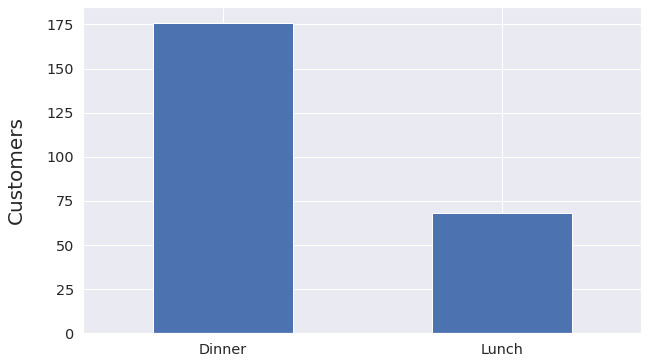

In [9]:
df.time.value_counts().plot(kind='bar', rot=0).set_ylabel('Customers')

### The average tip per time

In [10]:
df.groupby(['time'])['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

### Plot the previous results

Text(0, 0.5, 'Tips')

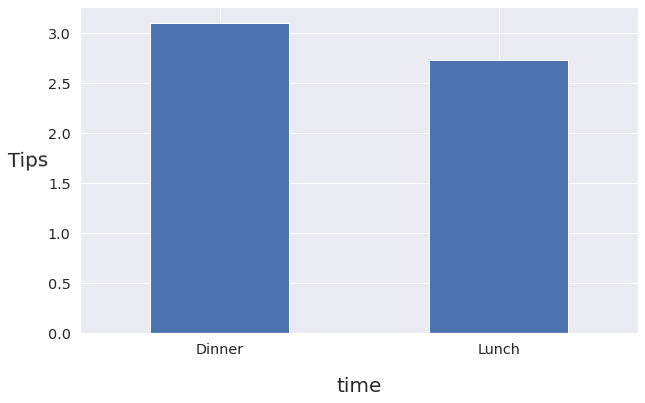

In [11]:
df.groupby(['time'])['tip'].mean().plot.bar(rot=0).set_ylabel('Tips', rotation=1)

### The average tip per party size

In [12]:
df.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

### Plot the previous results

Text(0, 0.5, 'Tip')

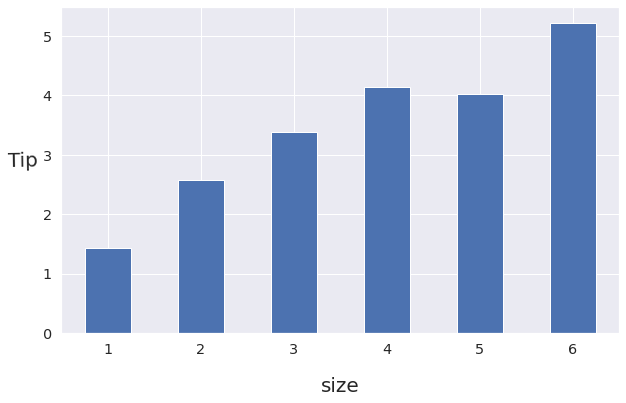

In [13]:
df.groupby(['size'])['tip'].mean().plot.bar(rot=0).set_ylabel('Tip', rotation=1)

### Average tip per day

Text(0, 0.5, 'Tip')

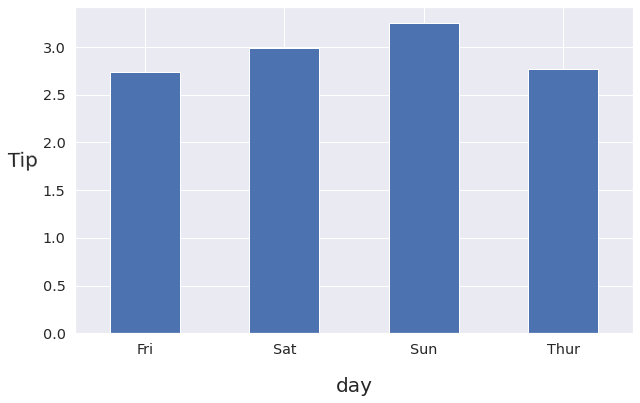

In [14]:
df.groupby(['day'])['tip'].mean().plot.bar(rot=0).set_ylabel('Tip', rotation=1)

### Average tip given by smokers and non smokers per party size

In [15]:
df.groupby(['smoker', 'size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
smoker,,,,,,
No,1.415,2.489000,3.069231,4.195769,5.046667,5.225
Yes,1.460,2.709545,4.095000,3.992727,2.500000,NaN


### Adding tip percentage of the total bill

In [16]:
df['tip_percentage'] = round((df.tip/df.total_bill)*100, 2).astype(str) + '%'

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%


### Relationship between total bill and tips

Text(0.5, 1.0, 'Relationship between total bill and tips')

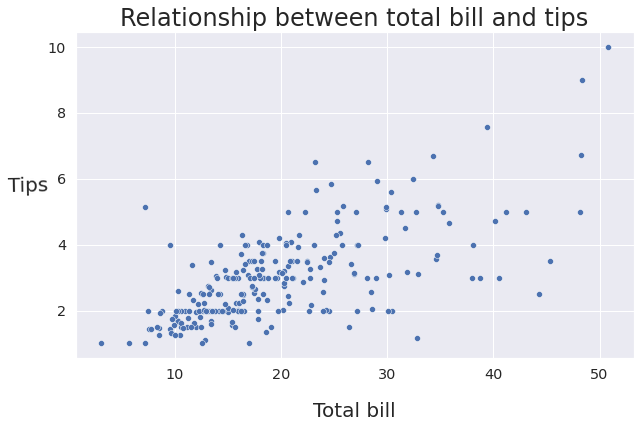

In [18]:
chart = sns.scatterplot(x='total_bill', y='tip', data=df)
chart.set_xlabel('Total bill')
chart.set_ylabel('Tips', rotation=1)
chart.set_title('Relationship between total bill and tips')

### Which day smokers and non smokers prefer to eat out

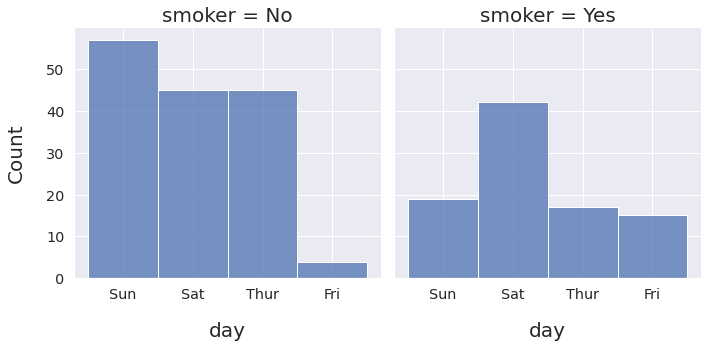

In [19]:
sns.displot(data=df, x='day', col='smoker')

### The differance in tips between smokers and non smkers per day

In [20]:
df.groupby(['day', 'smoker'])['tip'].mean().unstack()

smoker,No,Yes
day,,
Fri,2.812500,2.714000
Sat,3.102889,2.875476
Sun,3.167895,3.516842
Thur,2.673778,3.030000


### Plot the previous results

Text(0, 0.5, 'Tips')

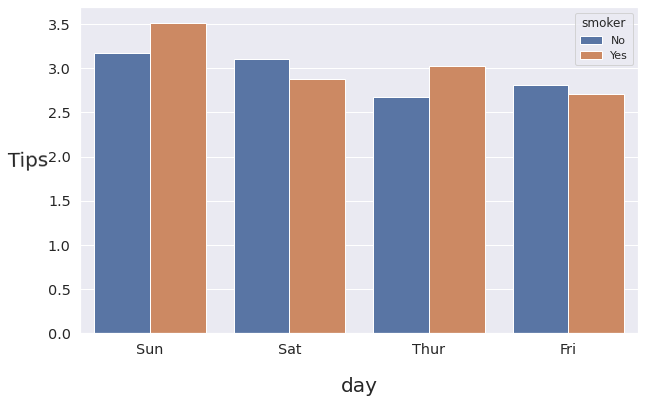

In [21]:
sns.barplot(data=df, x='day', y='tip',hue='smoker', ci = None).set_ylabel('Tips', rotation=1)